In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#loading data

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#checking for NaN values
print(train_df.info())
print(test_df.info())

print(train_df.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID    

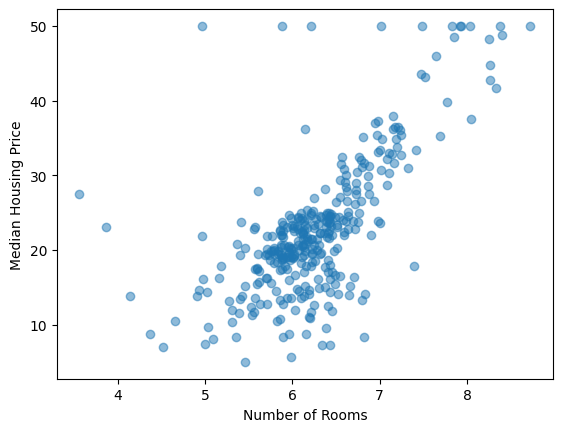

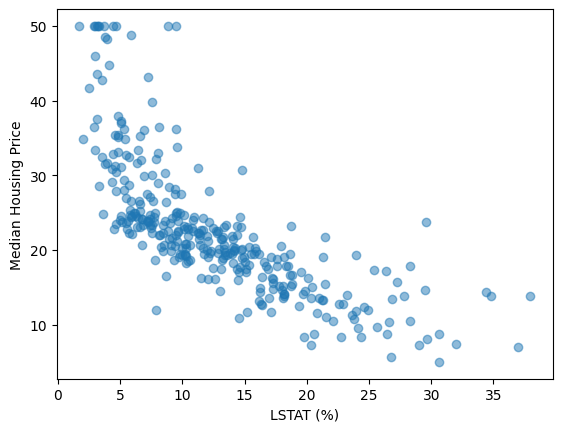

In [3]:
#visual for relationship of X and y features
'''choosing rm and lstat as X features and medv as y feature'''

X_train_rm = train_df['rm'].values
# print(X_rm)
# print(X_train_rm.shape)


X_train_lstat = train_df['lstat'].values

y_train = train_df['medv'].values
# print(y_train.shape)

plt.scatter(X_train_rm, y_train, alpha=0.5)
plt.xlabel("Number of Rooms")
plt.ylabel("Median Housing Price")
plt.show()

plt.scatter(X_train_lstat, y_train, alpha=0.5)
plt.xlabel("LSTAT (%)")
plt.ylabel("Median Housing Price")
plt.show()

In [14]:
#stack X frames together

X_train = np.column_stack((X_train_rm, X_train_lstat))
print(X_train.shape)

#predict function

def predict(X, w, b):
    '''This is a prediction function. It's defined by the formula y = weight*feature value + bias'''
    y_hat = X@w + b
    return y_hat


def MSE_loss (y, y_pred):
    '''This is MSE. The formula is 1/n * sum of all squared losses'''

    errors = y_pred - y
    loss = np.mean(errors**2)

    return loss

(333, 2)


In [15]:
def compute_gradients(X,y,w,b):
    '''We will compute gradient here which means we are computing new values for weights and biases. The thing is the weight is different for the 2 X features we have selected so be careful'''

    n = len(X)
    y_pred = predict(X, w, b)
    errors = y_pred - y

    grad_w = 2/n*(np.matmul(X.T,errors))
    grad_b = 2/n*(np.sum(errors))

    return grad_w, grad_b

In [16]:
def training(learning_rate, epoch):
    training_w = np.zeros(X_train.shape[1])
    training_b = 0.0

    loss_history = []

    for i in range(epoch):
        predicted_value = predict(X_train, training_w, training_b)
        loss = MSE_loss(y_train, predicted_value)
        loss_history.append(loss)

        grad_w, grad_b = compute_gradients(X_train, y_train, training_w, training_b)
        training_w = training_w - learning_rate*grad_w
        training_b = training_b - learning_rate*grad_b


    learned_weight = training_w
    learned_bias = training_b

    return learned_weight, learned_bias, loss_history



Learned Weight:  [ 4.79673644 -0.64074093]
Learned Bias:  0.6574754940093275


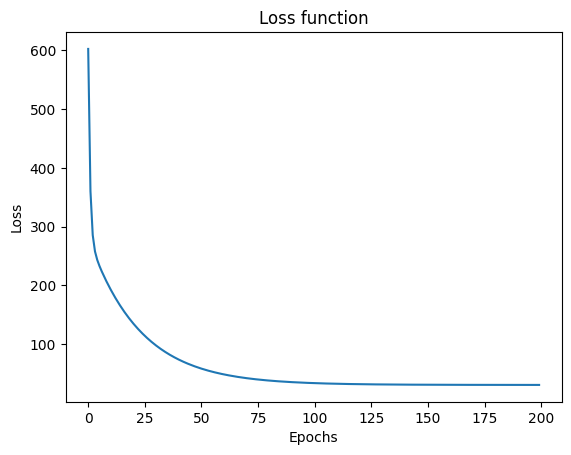

In [20]:
learned_weight, learned_bias, loss_history = training(0.001, 200)

print("Learned Weight: ", learned_weight)
print("Learned Bias: ", learned_bias)

#curving the loss function
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss function")
plt.show()

In [35]:
#testing
# test_df = pd.DataFrame('test.csv')
# print(test_df)
X_test_rm = test_df['rm'].values
# print(X_test_rm.shape)
X_test_lstat = test_df['lstat'].values
# pred_test = predict(X)
X_test = np.column_stack((X_test_rm,X_test_lstat))
print(X_test.shape)

y_pred = predict(X_test, learned_weight, learned_bias)
# print(y_pred)

print("Mean value of Housing Price: ", np.mean(y_pred))



(173, 2)
Mean value of Housing Price:  22.70170685749515


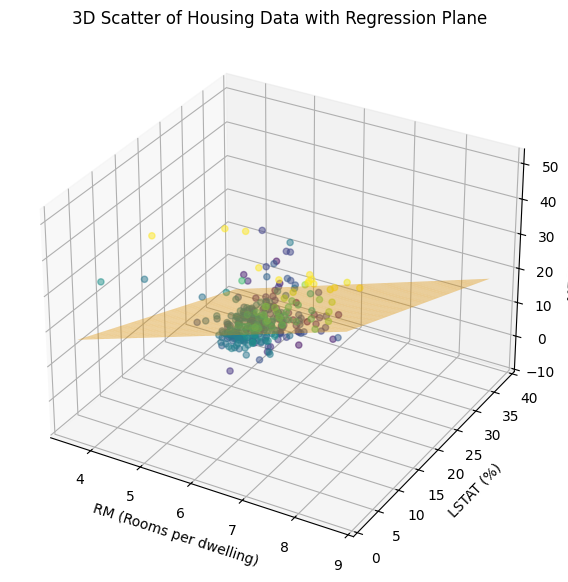

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Extract data ---
RM = X_train[:, 0]        # rm feature
LSTAT = X_train[:, 1]     # lstat feature
MEDV = y_train            # target

# --- 2. Create 3D scatter ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RM, LSTAT, MEDV, c=MEDV, cmap='viridis', alpha=0.5)

ax.set_xlabel("RM (Rooms per dwelling)")
ax.set_ylabel("LSTAT (%)")
ax.set_zlabel("MEDV (Price)")
ax.set_title("3D Scatter of Housing Data with Regression Plane")

# --- 3. Create a meshgrid for the plane ---
rm_range = np.linspace(RM.min(), RM.max(), 40)
lstat_range = np.linspace(LSTAT.min(), LSTAT.max(), 40)

RM_grid, LSTAT_grid = np.meshgrid(rm_range, lstat_range)

# --- 4. Regression plane values ---
W1 = learned_weight[0]
W2 = learned_weight[1]
b = learned_bias

Z_pred = W1 * RM_grid + W2 * LSTAT_grid + b

# --- 5. Plot the plane ---
ax.plot_surface(RM_grid, LSTAT_grid, Z_pred, alpha=0.4, color='orange')

plt.show()
